In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Defining useful functions

In [2]:
def binarize_image(path: str) -> cv2.Mat:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, code=cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

    return thresh


def generate_background(image_path: str, output_path: str):
    image = cv2.imread(image_path)
    image = cv2.resize(image, dsize=(512, 512))
    
    cv2.imwrite(os.path.join(output_path, 'bg01.png'), image)
    bboxes = []

    index = 0
    while True:
        x, y, w, h = cv2.selectROI('Selecting bounding box', image)
        image = cv2.rectangle(image, pt1=[x, y], pt2=[x+w, y+h], color=(0, 255, 0), thickness=2)

        mask_bg = np.zeros(shape=(512, 512))
        mask_bg[y:y+h, x:x+w] = 255

        cv2.imwrite(os.path.join(output_path, 'mask_bg_fg_%d.png' % index), mask_bg)
        index += 1
        bboxes.append([x, y, w, h])

        if cv2.waitKey(0) == ord('q'):
            print('Done.')
            cv2.destroyAllWindows()
            break

    return bboxes

# Using

In [3]:
output_path = os.path.join('inputs', 'same_domain', 'tomato on a tomato plant, view from side, ultra-realistic')
generate_background(
    image_path='inputs/same_domain/tomato on a tomato plant, view from side, ultra-realistic/eyJlZGl0cyI6eyJyZXNpemUiOnsid2lkdGgiOjUwMCwiaGVpZ2h0IjoyODF9fSwiYnVja2V0IjoiZmluZWdhcmRlbmluZy5zMy50YXVudG9uY2xvdWQuY29tIiwia2V5IjoiYXBwXC91cGxvYWRzXC92Zy1taWdyYXRpb25cLzIwMTFcLzAyXC8yNzIzNTQyNlwvVkdfdG9tcy5qcGcifQ==-2-2.png',
    output_path=output_path
)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


# Generating mask for the tomato

In [27]:
import cv2
import numpy as np
import pathlib
import matplotlib.pyplot as plt

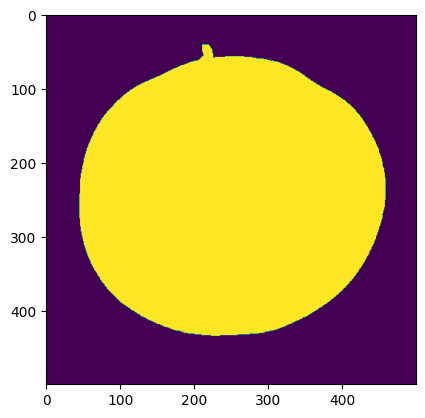

In [51]:
image_name = 'green_tomato_1.png'

image_folder = pathlib.Path('inputs/input_foregrounds/tomatoes/image/')
mask_folder = pathlib.Path('inputs/input_foregrounds/tomatoes/mask/')
image = cv2.imread(str(image_folder.joinpath(image_name)))
image = cv2.cvtColor(image, code=cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(image, thresh=1, maxval=255, type=cv2.THRESH_BINARY)
plt.imshow(thresh)

In [52]:
cv2.imwrite(str(mask_folder.joinpath(image_name)), thresh)

True